# Auswertung der fav Dateien
Erstellung der Graphen: 
- Prob density Ergebnislänge in Abh. des Fliptyps für einen cooling parameter
- Prob density Ergebnislänge in Abh. des cooling parameters je fliptype
- Prob density der Zeit des Erreichens der optimalen Länge in Abh. zum cooling parameter je fliptype

In [1]:
##### Ließt Dateien
#import json

#filename = "fav_revert_part_c0.85_breakp_0.01_starting_temp_70.json"

#fav_data = []

#flip_type = []

#for line in open(filename,"r"):
#    fav_data.append(json.loads(line))
#    flip_type.append(json.loads(line)[0])
    
#read.close()
#print(flip_type)

In [2]:
#import matplotlib.pyplot as plt

#for i in range(0,len(data)):
#    plt.plot(steps[i],laenge[i],label=filename_array[i])

#plt.xlabel("Zeitschritte")
#plt.ylabel("Länge")
#plt.legend()

#plt.show
#plt.savefig("Laufzeit-Laenge",dpi = 1000)

# Wahrscheinlichkeitsdichte swapping vs revert part

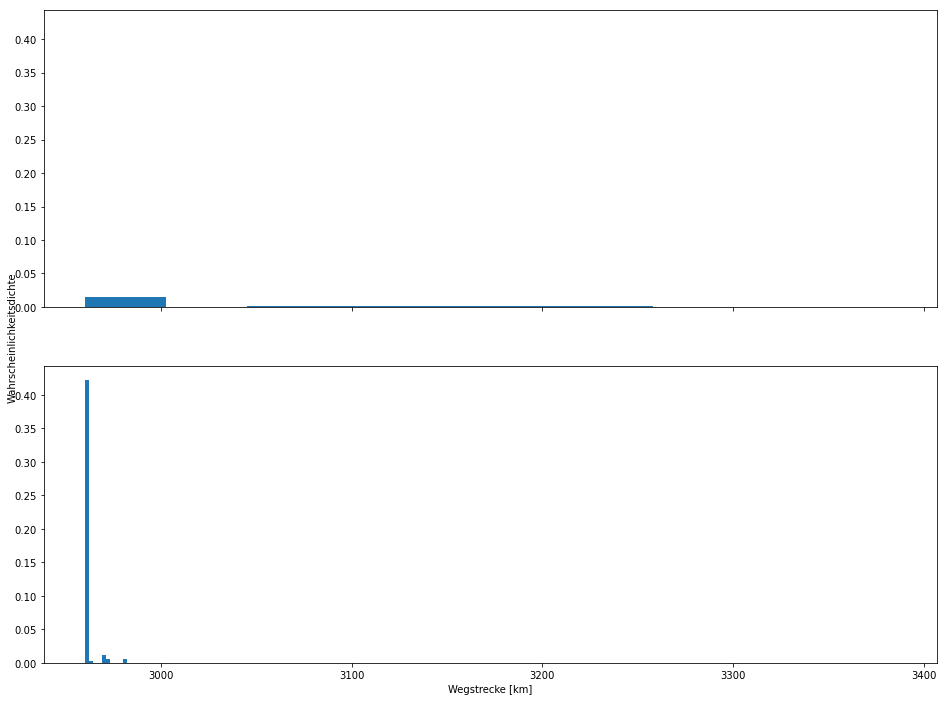

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import signal

##### Ließt Dateien
import json

fig, (plt1, plt2) = plt.subplots(2, figsize=(16,12), sharex=True, sharey=True)

files = [["prob_density/fav_swap_random_c0.99_breakp_0.05_starting_temp_70.json","Swapping",plt1],
         ["prob_density/fav_revert_part_c0.99_breakp_0.05_starting_temp_70.json","Revert part",plt2]]

#plt.figure(figsize=(12,8))
#plt.title("Vergleich der Wahrscheinlichkeitsdichten für die beiden Vertauschungsmethoden.")
#plt.ylabel('Wahrscheinlichkeitsdichte')
#plt.xlabel('Wegstrecke [km]');

for f in files:

    flip_type = []

    for line in open(f[0],"r"):
        flip_type.append(json.loads(line)[0])
    
    start = 2800
    end = 3400
    bins = 10
    bin_size = (end-start)/bins

    weg = np.linspace(start+(bin_size/2),end,bins)
    density = [0.0]*bins
    #density = list(np.float_(density))
    counts = [0]*bins

    d_hist = []
    
    for i in range(0, bins):
    
        range_start = start+(i*bin_size)
        range_end = start+(i*bin_size)+bin_size
    
        for d in flip_type:
            d_hist.append(d)
            if range_start < d < range_end:
                counts[i] += 1
            
            
    for i in range(0,len(density)):
        density[i] =  float(counts[i] / (len(flip_type)*bin_size))

    #plt.plot(weg, density, linewidth=2.0, label = f[1])
    f[2].hist(d_hist, density=True, bins=10, label = f[1])

    
# Legendenposition festlegen
#plt.legend(loc="best")
fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.xlabel('Wegstrecke [km]');

plt.show()

# Wahrscheinlichkeitsdichte SWAPPING & different cooling parameters

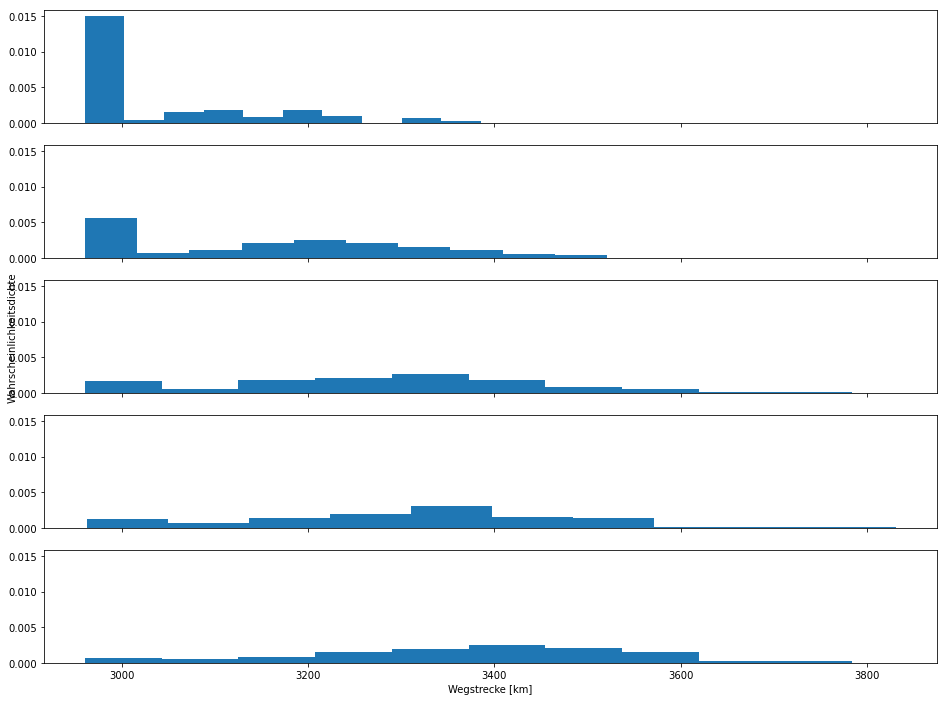

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import signal

##### Ließt Dateien
import json

fig, (plt1, plt2, plt3, plt4, plt5) = plt.subplots(5, figsize=(16,12), sharex=True, sharey=True)

files = [["prob_density/fav_swap_random_c0.99_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.99",plt1],
    ["prob_density/fav_swap_random_c0.95_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.95",plt2],
         ["prob_density/fav_swap_random_c0.9_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.90",plt3],
        ["prob_density/fav_swap_random_c0.85_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.85",plt4],
        ["prob_density/fav_swap_random_c0.8_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.80",plt5]]

#plt.figure(figsize=(12,8))
#plt.title("Wahrscheinlichkeitsdichten für die Vertauschungsmethode \"swapping\" für verschiedene Abkühlungsparameter.")

for f in files:

    average_cpu_time = 0.0
    flip_type = []
    
    counter = 0
    for line in open(f[0],"r"):
        flip_type.append(json.loads(line)[0])
        average_cpu_time += json.loads(line)[2]
        counter += 1
    
    start = 2700
    end = 3900
    bins = 10
    bin_size = (end-start)/bins

    weg = np.linspace(start+(bin_size/2),end,bins)
    density = [0.0]*bins
    #density = list(np.float_(density))
    counts = [0]*bins

    d_hist = []
    
    for i in range(0, bins):
    
        range_start = start+(i*bin_size)
        range_end = start+(i*bin_size)+bin_size
    
        for d in flip_type:
            d_hist.append(d)
            if range_start < d < range_end:
                counts[i] += 1
            
            
    for i in range(0,len(density)):
        density[i] =  float(counts[i] / (len(flip_type)*bin_size))

    label =  f[1] + " / " + r"$\varnothing$-Iterationen: " + str(round(average_cpu_time/counter))
    
    #plt.plot(weg, density, '-', label = label)
    f[2].hist(d_hist, density=True, bins=10, label = f[1])

# Legendenposition festlegen
#plt.legend(loc="best")
fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.xlabel('Wegstrecke [km]');
    
plt.show()

# Wahrscheinlichkeitsdichte REVERT PARTS & different cooling parameters

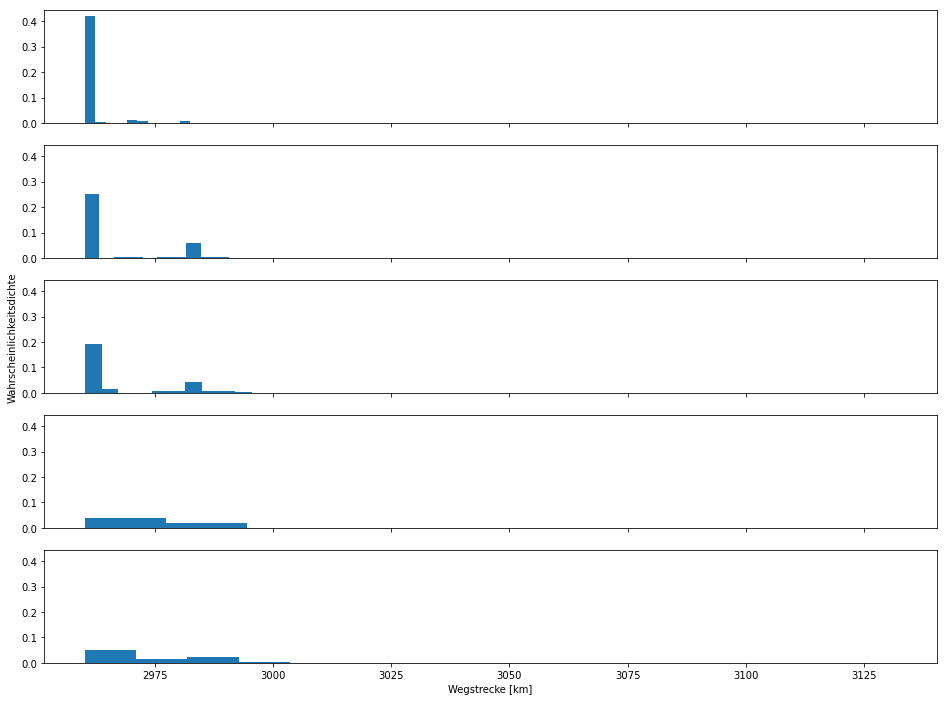

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
from scipy import signal

##### Ließt Dateien
import json

fig, (plt1, plt2, plt3, plt4, plt5) = plt.subplots(5, figsize=(16,12), sharex=True, sharey=True)

files = [["prob_density/fav_revert_part_c0.99_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.99",plt1],
         ["prob_density/fav_revert_part_c0.95_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.95",plt2],
         ["prob_density/fav_revert_part_c0.9_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.90",plt3],
        ["prob_density/fav_revert_part_c0.85_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.85",plt4],
        ["prob_density/fav_revert_part_c0.8_breakp_0.05_starting_temp_70.json","Abkühlungsparameter c = 0.80",plt5]]

#plt.figure(figsize=(12,8))
#plt.title("Wahrscheinlichkeitsdichten für die Vertauschungsmethode \"revert part\" für verschiedene Abkühlungsparameter.")
#plt.ylabel('Wahrscheinlichkeitsdichte')
#plt.xlabel('Wegstrecke [km]');

for f in files:

    average_cpu_time = 0.0
    flip_type = []

    
    counter = 0
    for line in open(f[0],"r"):
        flip_type.append(json.loads(line)[0])
        average_cpu_time += json.loads(line)[2]
        counter += 1
    
    start = 2940
    end = 3000
    bins = 10
    bin_size = (end-start)/bins

    weg = np.linspace(start+(bin_size/2),end,bins)
    density = [0.0]*bins
    #density = list(np.float_(density))
    counts = [0]*bins

    d_hist = []
    
    for i in range(0, bins):
    
        range_start = start+(i*bin_size)
        range_end = start+(i*bin_size)+bin_size
    
        for d in flip_type:
            d_hist.append(d)
            if range_start < d < range_end:
                counts[i] += 1
            
            
    for i in range(0,len(density)):
        density[i] =  float(counts[i] / (len(flip_type)*bin_size))

    label =  f[1] + " / " + r"$\varnothing$-Iterationen: " + str(round(average_cpu_time/counter))
    #plt.plot(weg, density, linewidth=2.0, label = label)
    f[2].hist(d_hist, density=True, bins=10, label = f[1])

# Legendenposition festlegen
#plt.legend(loc="best")

fig.add_subplot(1, 1, 1, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.ylabel('Wahrscheinlichkeitsdichte')
plt.xlabel('Wegstrecke [km]');
    
plt.show()

# Auswertung der history Dateien
Erstellung der Graphen:
- Weglänge in Abhängigkeit der Zeit

In [6]:
######Ließt dateien
import json

fileprefix_start = 0 #Um mehrere Dateien einzulesen -> Im Dateinamen ändert sich nur die erste Zahl -> diese ist der prefix
fileprefix_end = 3
filesufix = ["_history_revert_part_c0.85_breakp_0.01_starting_temp_70.json","_history_swap_random_c0.85_breakp_0.01_starting_temp_70.json"]
fliptypes = ["revert_part","swap_random"]

data = [] #hier werden alle Daten aller history dateien gespeichert
filename_array = []

for i in range(fileprefix_start,fileprefix_end):
    for j in range(0,len(filesufix)):
        filename = str(i) + filesufix[j]
        read = open(filename,"r")
        data.append(json.load(read))
        filename_array.append(str(i)+";"+ fliptypes[j])

read.close()  

FileNotFoundError: [Errno 2] No such file or directory: '0_history_revert_part_c0.85_breakp_0.01_starting_temp_70.json'

In [ ]:
######speichert unterschiedliche Datenarten in untersch. Listen

##Datenstruktur bisher:
#Datenstruktur eines Eintrages: Länge, Temperatur, runtime, steps, path
#Datenstruktur data: data[Nummer Durchlauf][Nummer des Eintrages des Durchlaufes für einen Zeitpunkt][Datenart im Eintrag]

##Datenstruktur danach:
#laenge[im Durchlauf][zum Zeitpunkt]

laenge = []
temperature = []
runtime = []
steps = []
path = []

for i in range(0,len(data)): #über Nummer des Durchlaufes
    laenge_zeile = []
    temperature_zeile = []
    runtime_zeile = []
    steps_zeile = []
    path_zeile = []
    for j in range(0,len(data[i])): #über versch. Zeitpunkte
        laenge_zeile.append(data[i][j][0])
        temperature_zeile.append(data[i][j][1])
        runtime_zeile.append(data[i][j][2])
        steps_zeile.append(data[i][j][3])
        path_zeile.append(data[i][j][4])
    laenge.append(laenge_zeile)
    temperature.append(temperature_zeile)
    runtime.append(runtime_zeile)
    steps.append(steps_zeile)
    path.append(path_zeile)

In [ ]:
import matplotlib.pyplot as plt

for i in range(0,len(data)):
    plt.plot(steps[i],laenge[i],label=filename_array[i])

plt.xlabel("Zeitschritte")
plt.ylabel("Wegstrecke [km]")
plt.legend()

plt.show
plt.savefig("Laufzeit-Laenge",dpi = 1000)